<a href="https://colab.research.google.com/github/Hamza-313/FUTURE_DS_03/blob/main/College_Event_Feedback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**College Event Feedback Analysis**


In [2]:
#intsall Required Libraries
!pip install textblob wordcloud matplotlib seaborn

In [3]:
!pip install nltk

In [4]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [5]:
#Load Data
from google.colab import files
uploaded=files.upload()

Saving student_feedback.csv to student_feedback.csv


In [6]:
df=pd.read_csv('student_feedback.csv')

In [7]:
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [8]:
#Clean Data
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
df.head()

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [10]:
# Basic Statistics
print("Dataset Shape:",df.shape)
print("\nColumns Names:",df.columns.tolist())
print("\nDiscriptive Stats:\n",df.describe())


Dataset Shape: (1001, 9)

Columns Names: ['Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']

Discriptive Stats:
         Student ID  Well versed with the subject  \
count  1001.000000                   1001.000000   
mean    500.000000                      7.497502   
std     289.108111                      1.692998   
min       0.000000                      5.000000   
25%     250.000000                      6.000000   
50%     500.000000                      8.000000   
75%     750.000000                      9.000000   
max    1000.000000                     10.000000   

       Explains concepts in an understandable way  Use of presentations  \
count                                 1001.000000           1001.000000   
mean   

/tmp/ipython-input-542002459.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")


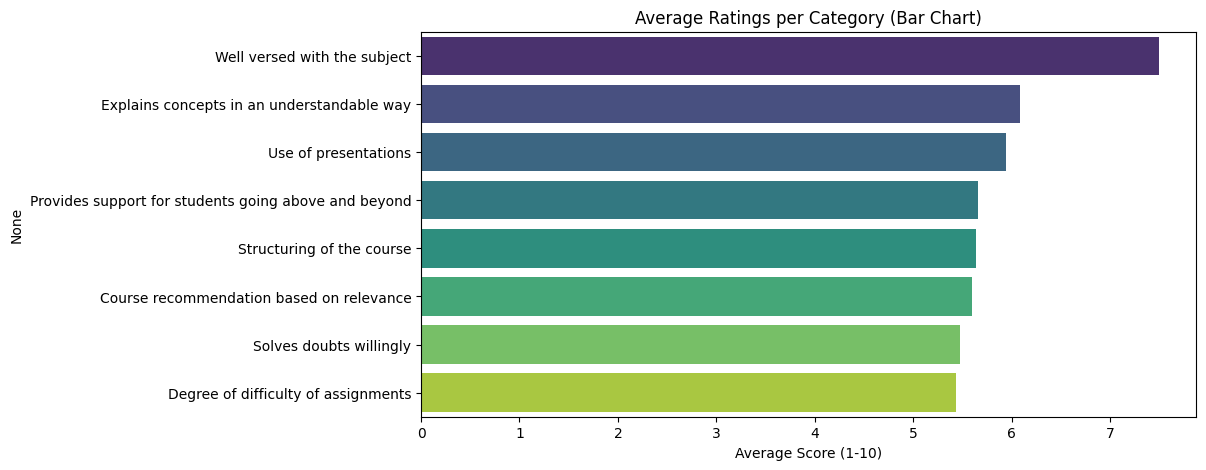

In [11]:
# Average Ratings per Category
avg_scores = df.drop(columns=["Student ID"]).mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")
plt.title("Average Ratings per Category (Bar Chart)")
plt.xlabel("Average Score (1-10)")
plt.show()

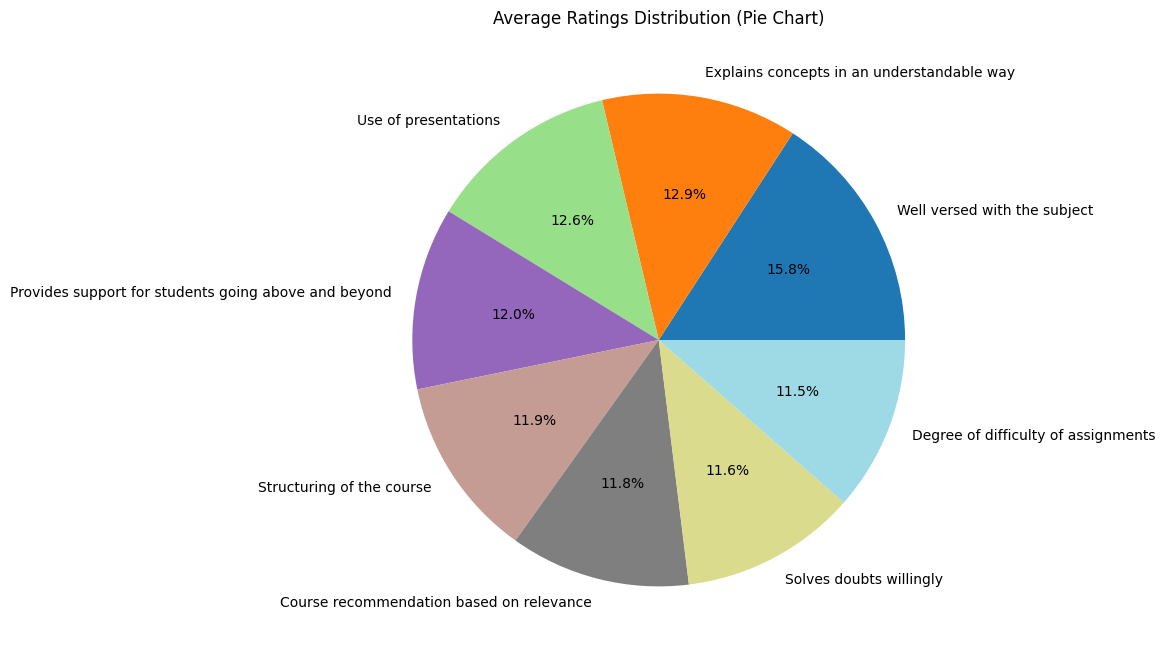

In [12]:
avg_scores.plot.pie(autopct="%1.1f%%", figsize=(8,8), colormap="tab20")
plt.title("Average Ratings Distribution (Pie Chart)")
plt.ylabel("")

plt.show()

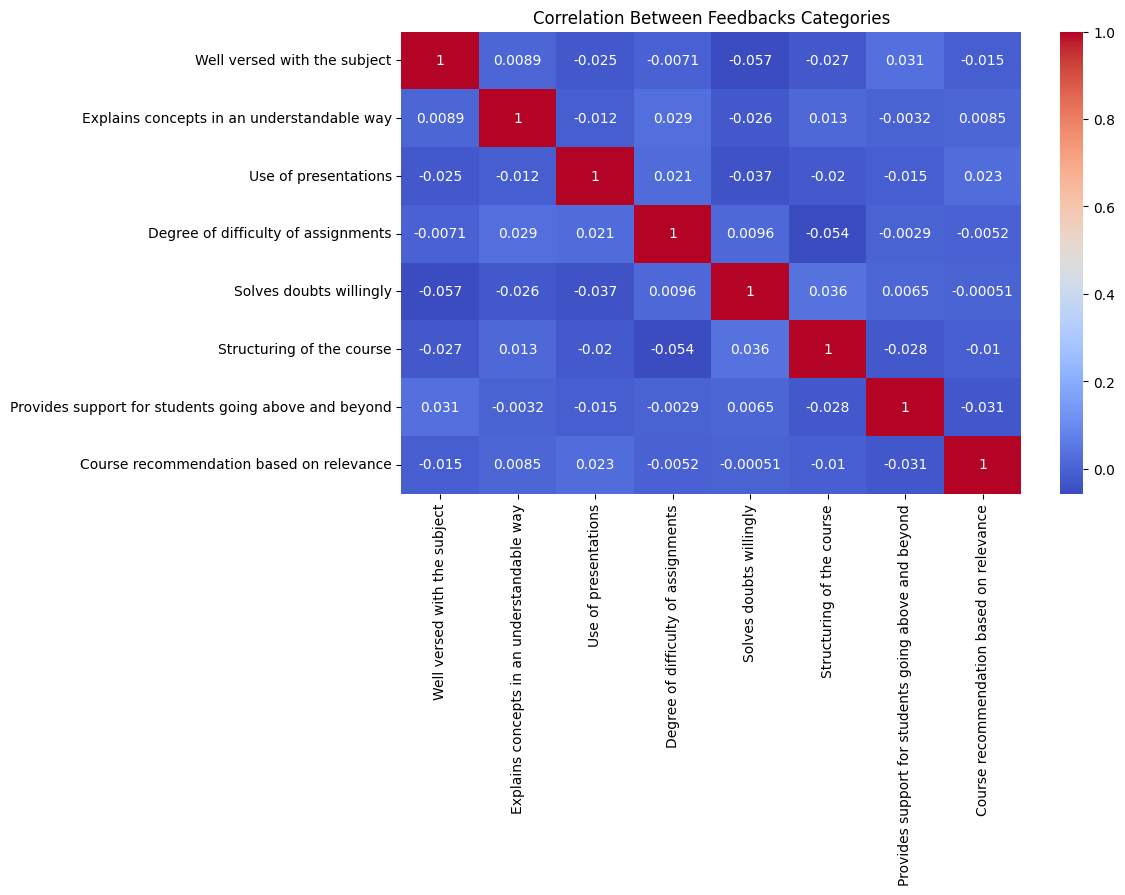

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=["Student ID"]).corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Between Feedbacks Categories")

plt.show()

In [14]:
print("\nTop 3 Strenghts:")
print(avg_scores.head(3))
print("\nTop 3 Weaknesses:")
print(avg_scores.tail(3))


Top 3 Strenghts:
Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64

Top 3 Weaknesses:
Course recommendation based on relevance    5.598402
Solves doubts willingly                     5.474525
Degree of difficulty of assignments         5.430569
dtype: float64


# **NLP Sentiment Analysis**

In [15]:
#Simulate Feedback Column (since no real comments exist)
sample_comments = [
    "The teacher was very engaging and helpful!",
    "Assignments were too difficult and unclear.",
    "Great use of presentations, made concepts easier.",
    "Course structure was poor, needs improvement.",
    "Loved the way doubts were solved quickly!",
    "Very boring sessions, not interactive at all.",
    "Best course I have attended so far!",
    "The support was lacking for advanced topics.",
    "Excellent explanations, very clear and simple.",
    "Not recommended, workload too high."
]
np.random.seed(42)
df["Feedback"] = np.random.choice(sample_comments, size=len(df))

In [16]:
#TextBlob Sentiment
def get_textblob_sentiment(text):
  polarity=TextBlob(text).sentiment.polarity
  if polarity >0.05:
    return "Positive"
  elif polarity<-0.05:
    return "Negative"
  else:
    return "Neutral"
df["TextBlob Sentiment"]=df["Feedback"].apply(get_textblob_sentiment)

In [17]:
#VADER Sentiment
sia=SentimentIntensityAnalyzer()
def get_vader_sentiment(text):
  score=sia.polarity_scores(text)["compound"]
  if score>0.05:
    return "Positive"
  elif score <-0.05:
    return "Negative"
  else:
    return "Neutral"
df["Vader Sentiment"]=df["Feedback"].apply(get_vader_sentiment)

/tmp/ipython-input-3360526591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Vader Sentiment", data=df, ax=axes[0], palette="Set2")


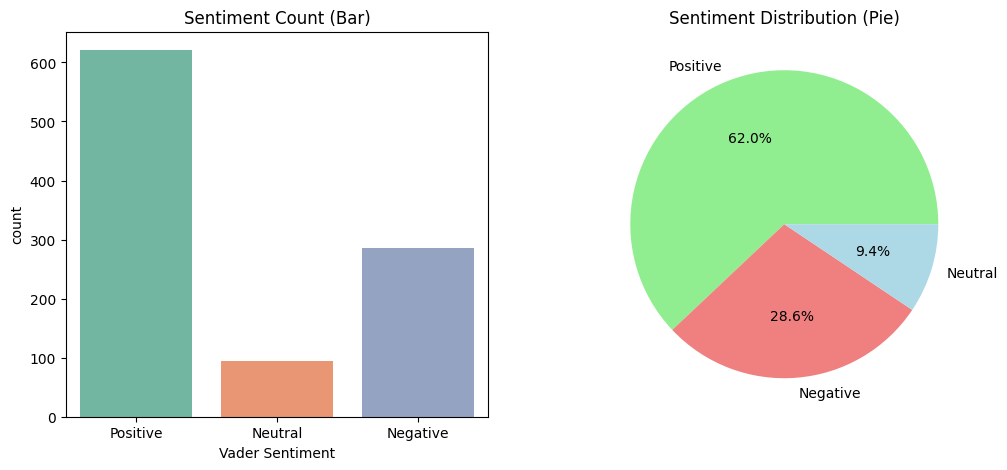

In [18]:
# --- 8. Sentiment Distribution (Bar + Pie) ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x="Vader Sentiment", data=df, ax=axes[0], palette="Set2")
axes[0].set_title("Sentiment Count (Bar)")
df["Vader Sentiment"].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[1], colors=["lightgreen","lightcoral","lightblue"])
axes[1].set_ylabel("")
axes[1].set_title("Sentiment Distribution (Pie)")
plt.show()


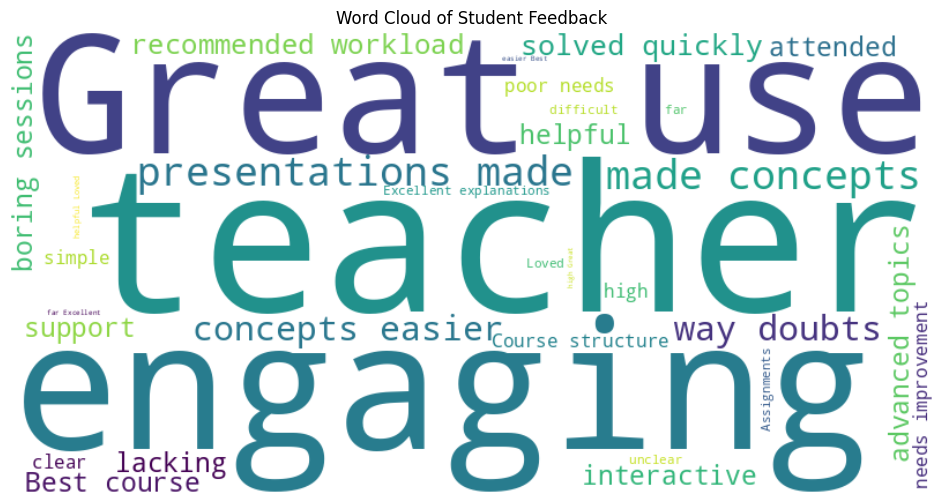

In [19]:

# Word Cloud
text = " ".join(df["Feedback"].tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Student Feedback")
plt.show()


# **Ratings + Sentiments Merge**

In [20]:
rating_cols = [col for col in df.columns if col not in ["Student ID", "Feedback","TextBlob Sentiment", "VADER Sentiment"]]
df[rating_cols] = df[rating_cols].apply(pd.to_numeric, errors='coerce')
df["Overall Rating"] = df[rating_cols].mean(axis=1)

In [21]:
def rating_category(score):
    if score >= 7:
        return "High"
    elif score >= 4:
        return "Medium"
    else:
        return "Low"
df["Rating Category"] = df["Overall Rating"].apply(rating_category)

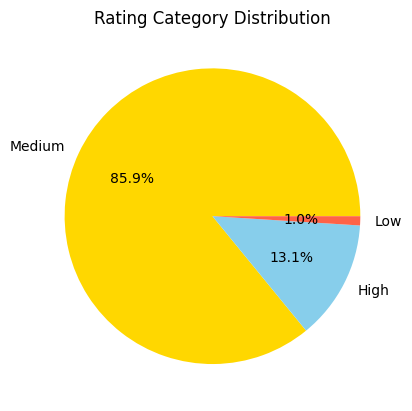

In [22]:
df["Rating Category"].value_counts().plot.pie(autopct="%1.1f%%", colors=["gold","skyblue","tomato"])
plt.title("Rating Category Distribution")
plt.ylabel("")
plt.show()

# ** Insights for Decisions**

In [23]:
print("\n📌 Insights & Decisions:")
print(f"1. Top 3 strengths: {list(avg_scores.head(3).index)} → keep promoting these areas.")
print(f"2. Top 3 weaknesses: {list(avg_scores.tail(3).index)} → need improvements here.")
print("3. Positive feedback is the majority (students feel satisfied).")
print("4. Low-rating students often give negative comments — target them for improvements.")
print("5. Common issues mentioned: 'assignments too difficult', 'poor structure'.")
print("6. Next step → simplify assignments, improve structure, keep interactive teaching.")


📌 Insights & Decisions:
1. Top 3 strengths: ['Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations'] → keep promoting these areas.
2. Top 3 weaknesses: ['Course recommendation based on relevance', 'Solves doubts willingly', 'Degree of difficulty of assignments'] → need improvements here.
3. Positive feedback is the majority (students feel satisfied).
4. Low-rating students often give negative comments — target them for improvements.
5. Common issues mentioned: 'assignments too difficult', 'poor structure'.
6. Next step → simplify assignments, improve structure, keep interactive teaching.


In [24]:
!pip uninstall -y pandas-profiling
!pip install ydata-profiling

from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Student Feedback Report", explorative=True)
profile.to_file("Student_Feedback_Report.html")

files.download("Student_Feedback_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 22.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
files.download("Student_Feedback_Report.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
from google.colab import files
uploaded = files.upload()


Saving college_event_feedback_analysis.ipynb to college_event_feedback_analysis.ipynb


In [32]:
import nbformat

# Load notebook - Replace "YourNotebook.ipynb" with the actual name of your notebook file
with open("college_event_feedback_analysis.ipynb") as f:
    nb = nbformat.read(f, as_version=4)

# Remove widget metadata
if "widgets" in nb["metadata"]:
    del nb["metadata"]["widgets"]

# Save clean notebook
with open("college_event_feedback_analysis.ipynb", "w") as f:
    nbformat.write(nb, f)

In [34]:
!jupyter nbconvert --to html college_event_feedback_analysis.ipynb

[NbConvertApp] Converting notebook college_event_feedback_analysis.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 1058548 bytes to college_event_feedback_analysis.html
